### 1. Regular Gradient Descent with partial derivatives

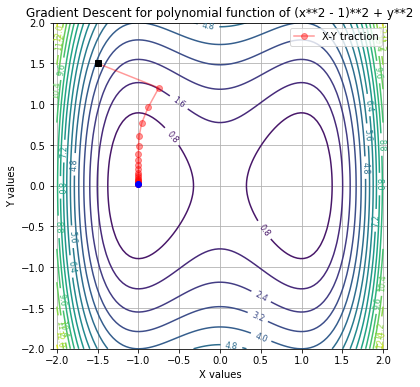

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return  (x**2 - 1)**2 + y**2

def grad_f(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

def gradient(x0, eta, n_iter):
    points = [x0]

    x = x0
    for i in range(n_iter):
        x = x - eta * grad_f(*x)
        points.append(x)

    return np.array(points)

if __name__ == '__main__':
    
    x0 = np.array([-1.5, 1.5])
    eta = 0.1
    n_iter = 20

    points = gradient(x0, eta, n_iter)

    x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig, ax = plt.subplots(figsize=(6, 6))
    cs = ax.contour(X, Y, Z, cmap='viridis', levels=20)
    ax.clabel(cs, inline=True, fontsize=8)

    ax.plot(points[:, 0], points[:, 1], color='r', marker='o', alpha=0.4, label='X-Y traction')

    # starting X-Y values
    ax.plot(points[0, 0], points[0, 1], 'ks')

    # ending X-Y values (extremum)
    ax.plot(points[-1, 0], points[-1, 1], 'bo')
    
    ax.set_title('Gradient Descent for polynomial function of (x**2 - 1)**2 + y**2')
    ax.set_xlabel('X values')
    ax.set_ylabel('Y values') 
    ax.axis('equal')
    ax.legend()

    plt.grid()
    plt.show()

### 2. Batch Gradient Descent

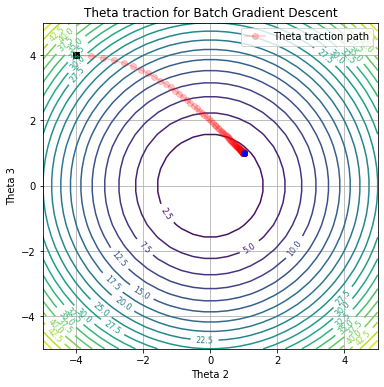

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(44)

x, y = np.linspace(-5, 5, 30), np.linspace(-5, 5, 30)

xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2

x_flat, y_flat, z_flat = xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1), zz.flatten().reshape(-1, 1)
X = np.hstack((x_flat, y_flat, x_flat**2, y_flat**2))

eta = 1e-6
n_iter = 1000
m = X.shape[0]

theta = np.array([0, 0, -4, 4]).reshape(-1, 1)  # (4, 1)
thetas = [theta.copy()]

for i in range(n_iter):
    gradient = X.T.dot(X.dot(theta) - z_flat)   # (4, 1)
    theta = theta - eta * gradient
    thetas.append(theta.copy())

thetas_arr = np.array([thetas]).flatten().reshape(-1, 4)    # (m, 4)

# z = th0 * x + th1 * y + th2 * x**2 + th3 * y**2
th0, th1, th2, th3 = thetas_arr[:, 0], thetas_arr[:, 1], thetas_arr[:, 2], thetas_arr[:, 3]

fig, ax = plt.subplots(figsize=(6, 6))
cs = ax.contour(xx, yy, zz, cmap='viridis', levels=20)
ax.clabel(cs, inline=True, fontsize=8)

ax.plot(th2, th3, color='r', marker='o', alpha=0.2, label='Theta traction path')

# initial theta values
ax.plot(th2[0], th3[0], 'ks')

# final theta values
ax.plot(th2[-1], th3[-1], 'bo')

ax.set_xlabel('Theta 2')
ax.set_ylabel('Theta 3')
ax.set_title('Theta traction for Batch Gradient Descent')
ax.legend()

plt.grid()
plt.show()

### 3. Normal Equation - closed form

In [11]:
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(z_flat))

array([[3.54507343e-17],
       [2.70843610e-15],
       [1.00000000e+00],
       [1.00000000e+00]])

### 4. Stochastic Gradient Descent

The final theta is:
 [[0.05109081]
 [0.1415131 ]
 [0.98437843]
 [0.98333225]]


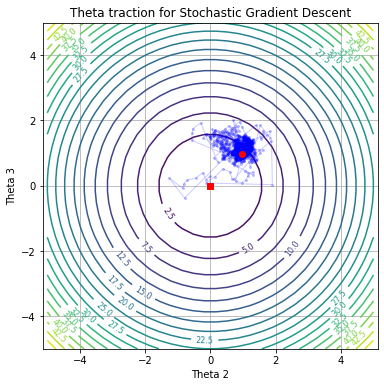

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(44)

x, y = np.linspace(-5, 5, 30), np.linspace(-5, 5, 30)

xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2

x_flat, y_flat, z_flat = xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1), zz.flatten().reshape(-1, 1)
X = np.hstack((x_flat, y_flat, x_flat**2, y_flat**2))

# data standarization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

t0, t1 = 5, 50
n_epochs = 50
m = X.shape[0]

theta = np.array([0, 0, 4, 4]).reshape(-1, 1)   # (4, 1)
thetas = [theta.copy()]

# random initialization
def learning_rate(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m)
        xi = X_scaled[rand_idx: rand_idx + 1]   # (1, 4)
        yi = z_flat[rand_idx: rand_idx + 1]

        gradient = xi.T.dot(xi.dot(theta) - yi) # (4, 1)
        eta = learning_rate(epoch * m + i)
        theta = theta - eta * gradient

        thetas.append(theta.copy())

print(f"The final θ value is:\n {theta / X_std.reshape(-1, 1)}")

# archived (historical) values of θ tracking path
thetas_arr = np.array(thetas).flatten().reshape(-1, 4) / X_std  # (m, 4)

# extracking θ values as column vectors
th0, th1, th2, th3 = thetas_arr[:, 0], thetas_arr[:, 1], thetas_arr[:, 2], thetas_arr[:, 3]

fig, ax = plt.subplots(figsize=(6, 6))
cs = ax.contour(xx, yy, zz, cmap='viridis', levels=20)
ax.clabel(cs, inline=True, fontsize=8)

ax.plot(th2, th3, color='b', marker='o', markersize=3, alpha=0.2, label='θ tracking path')

# the initial and final θ values
ax.plot(th2[0], th3[0], 'ks')
ax.plot(th2[-1], th3[-1], 'ro')

ax.set_xlabel('Theta 2')
ax.set_ylabel('Theta 3')
ax.set_title('Tracking path for Stochastic Gradient Descent')

ax.axis([-1, 3, -1, 3])
ax.legend()

plt.grid()
plt.show()